<a href="https://colab.research.google.com/github/anubhavg2908/BDDA-Project/blob/main/Goup_12_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from pathlib import Path


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Path to data folder:

pathToFolder = "/gdrive/MyDrive/bdda1"

In [ ]:
path = Path(pathToFolder) / "WineQuality.csv"

In [ ]:
# Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
#Loading and Preprocessing Data
data = pd.read_csv(path)

In [ ]:
print(data['Type'].unique())

['White Wine' 'Red Wine']


In [ ]:
data['Type']=data['Type'].map({'White Wine':0,'Red Wine':1 })


In [ ]:
X = data.drop(['quality'], axis=1)
y = data['quality']


In [ ]:
# Data Cleaning
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 3.5 MB


In [ ]:
data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,0
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,0
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,0
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,0
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,0
32481,6414,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,0
32482,1126,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,0
32483,2924,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,0


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='quality', ylabel='Count'>

Text(0.5, 0, 'Wine Quality')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Wine Quality')

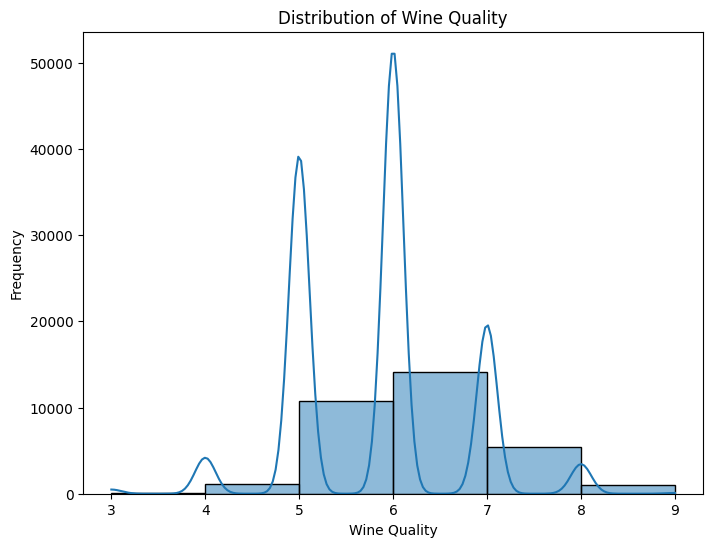

In [ ]:
#Exploratory Data Analysis (EDA)
# Histogram of wine quality
plt.figure(figsize=(8, 6))
sns.histplot(data['quality'], bins=6, kde=True)
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()



<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Type', ylabel='quality'>

Text(0.5, 0, 'Wine Type')

Text(0, 0.5, 'Wine Quality')

Text(0.5, 1.0, 'Box Plot of Wine Quality by Wine Type')

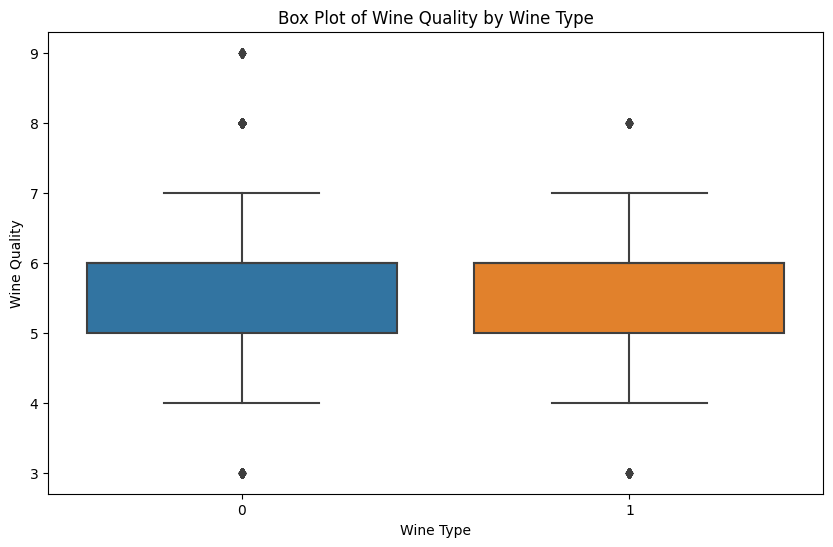

In [ ]:
# Box Plot of Wine Quality by Wine Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='quality', data=data)
plt.xlabel('Wine Type')
plt.ylabel('Wine Quality')
plt.title('Box Plot of Wine Quality by Wine Type')
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='alcohol', ylabel='pH'>

Text(0.5, 0, 'Alcohol Content')

Text(0, 0.5, 'pH')

Text(0.5, 1.0, 'Scatter Plot of Alcohol Content vs. pH')

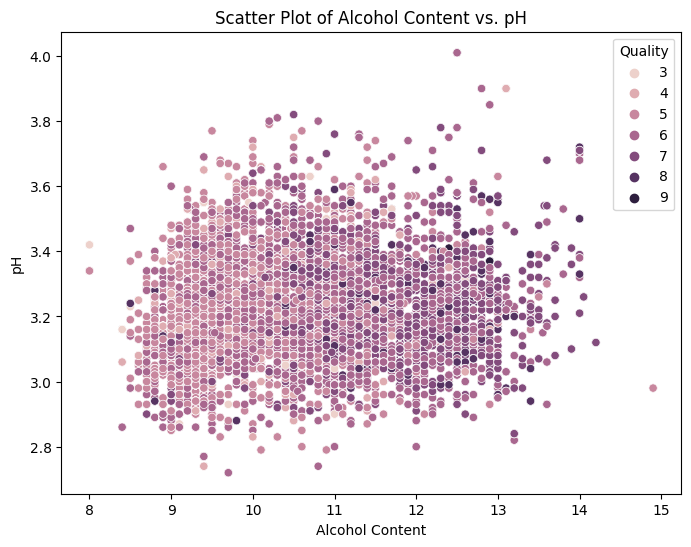

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='pH', data=data, hue='quality')
plt.xlabel('Alcohol Content')
plt.ylabel('pH')
plt.title('Scatter Plot of Alcohol Content vs. pH')
plt.legend(title='Quality')
plt.show()


Text(0.5, 1.02, 'Pair Plot of Select Features by Wine Quality')

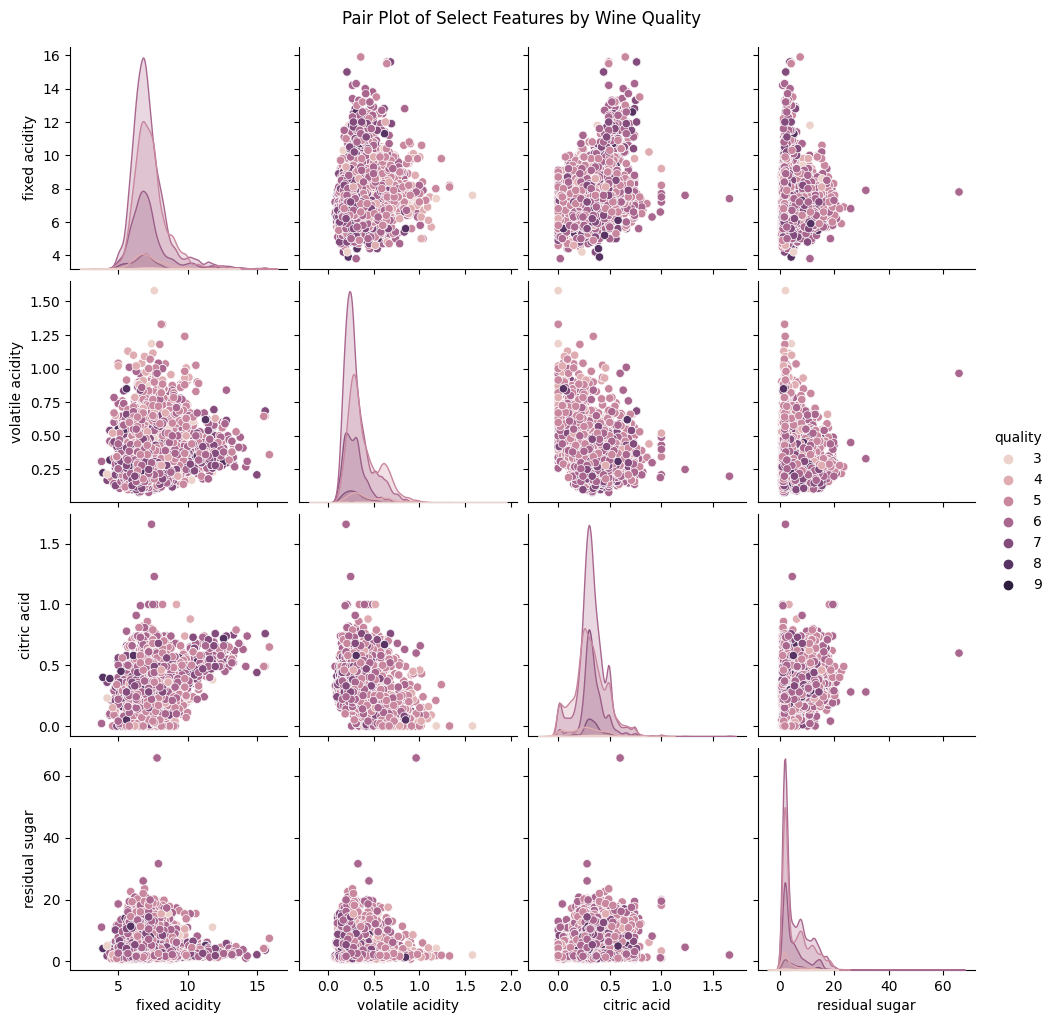

In [ ]:
# Pair Plot
sns.pairplot(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'quality']], hue='quality', diag_kind='kde')
plt.suptitle('Pair Plot of Select Features by Wine Quality', y=1.02)
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Type', ylabel='count'>

Text(0.5, 0, 'Wine Type')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Wine Types')

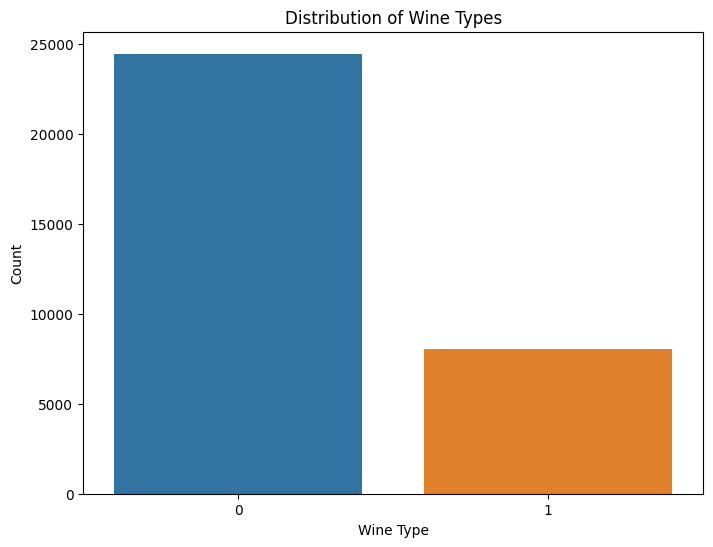

In [ ]:
# Bar Plot of Wine Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data)
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.title('Distribution of Wine Types')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='quality', ylabel='count'>

Text(0.5, 0, 'Wine Quality')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Wine Quality by Wine Type')

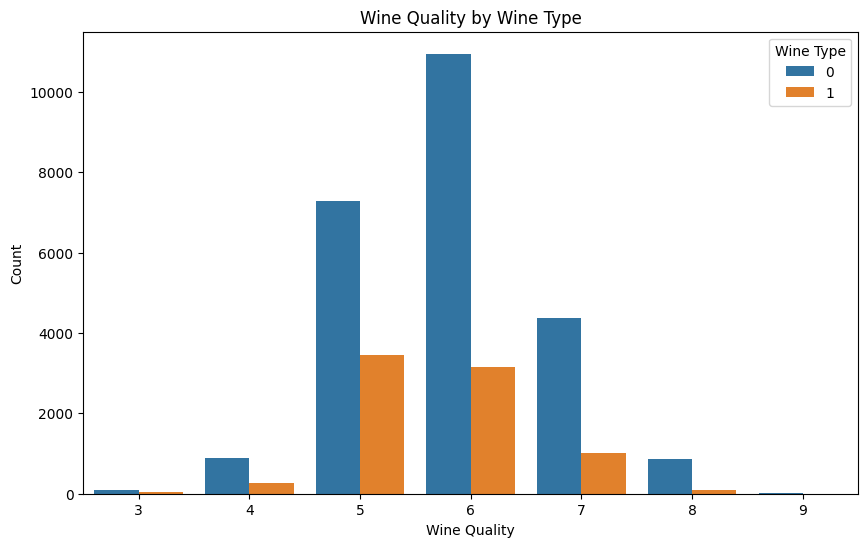

In [ ]:
# Grouped Bar Plot of Wine Quality by Wine Type
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='Type', data=data)
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Wine Quality by Wine Type')
plt.legend(title='Wine Type')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='citric acid', ylabel='count'>

Text(0.5, 0, 'Citric Acid Levels')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Count Plot of Citric Acid Levels by Wine Type')

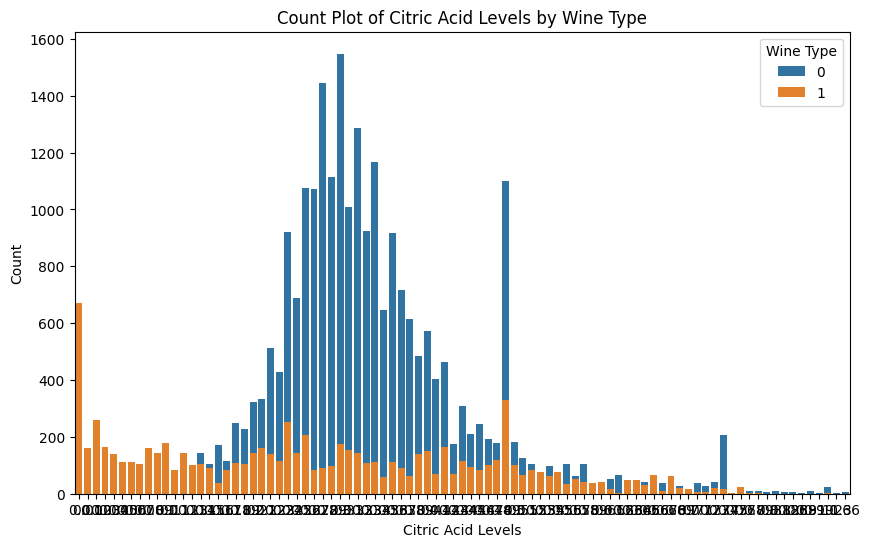

In [ ]:
# Count Plot of Citric Acid Levels by Wine Type
plt.figure(figsize=(10, 6))
sns.countplot(x='citric acid', hue='Type', data=data, dodge=False)
plt.xlabel('Citric Acid Levels')
plt.ylabel('Count')
plt.title('Count Plot of Citric Acid Levels by Wine Type')
plt.legend(title='Wine Type')
plt.show()

In [ ]:
# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#PCA (Principal Component Analysis)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 0.26811715, -0.96372   , -0.22732539, ...,  0.17513879,
        -0.74165825,  0.16316203],
       [-1.91101188, -0.78547808, -0.80780182, ..., -0.59501557,
         1.03780751,  0.11972865],
       [-0.62521052, -2.89540597, -1.56441141, ..., -0.84989101,
         0.23868845,  0.50455901],
       ...,
       [ 0.04680649, -1.49495348, -1.72377469, ..., -0.54450276,
        -0.47690515,  0.26443118],
       [-0.78602586, -3.00967333,  0.586613  , ..., -0.26942329,
         1.23834151,  0.62280179],
       [-0.90595462,  3.00325674, -0.26349152, ...,  0.07294802,
         0.44144974, -0.36665913]])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Number of Principal Components')

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

Text(0.5, 1.0, 'Cumulative Explained Variance Ratio by Number of Principal Components')

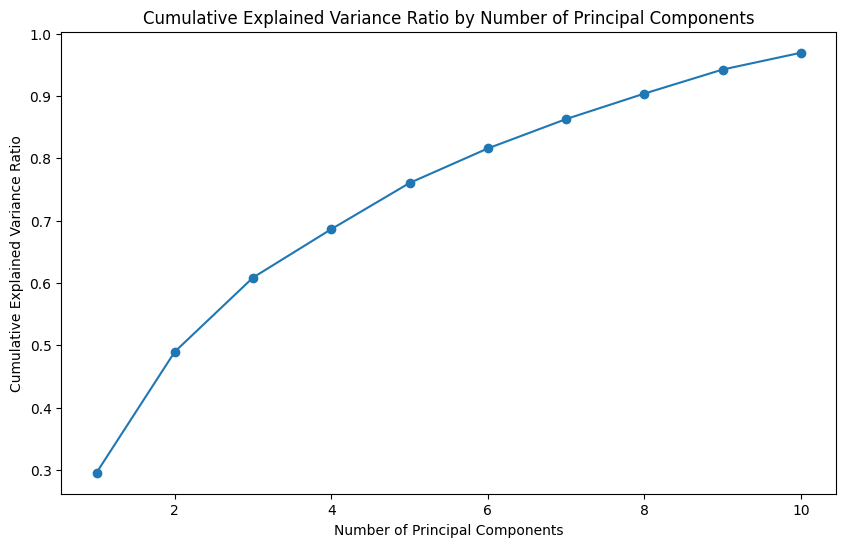

In [ ]:
# Explained Variance Ratio Plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, 'Scatter Plot of First Two Principal Components')

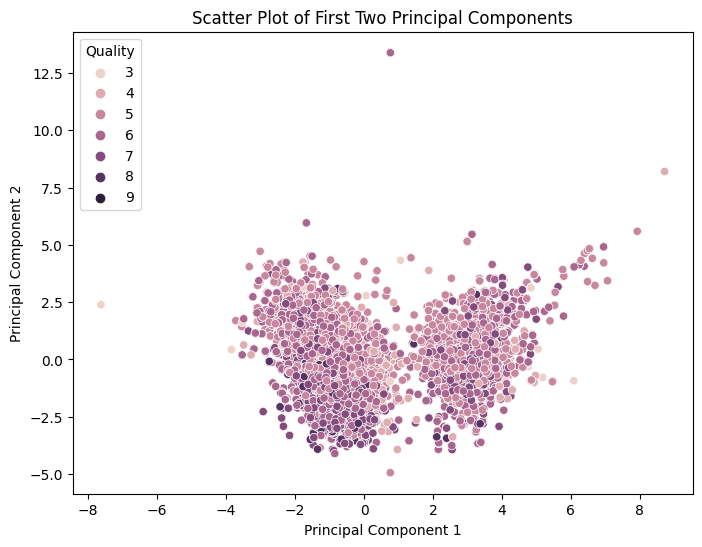

In [ ]:
# Scatter Plot of First Two Principal Components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['quality'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.legend(title='Quality')
plt.show()

In [ ]:
#  Model Building
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
#  Prediction and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")



Mean Squared Error: 0.03090371829598621


THE MSE shows the model predicts the actual values correctly as the mse is less than 0.1

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.959836366778552

THE R2Score shows the model predicts the actual values correctly as the R2Score is more than 0.95

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

       Actual  Predicted
3835        7        7.0
3578        5        5.0
17679       6        6.0
31387       7        7.0
12801       5        5.0
...       ...        ...
4387        5        5.0
9366        3        3.0
10790       6        6.0
26944       5        5.0
27880       4        4.0

[8122 rows x 2 columns]


The actual and predicted values are rightly matched

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Actual Wine Quality')

Text(0, 0.5, 'Predicted Wine Quality')

Text(0.5, 1.0, 'Predicted vs. Actual Wine Quality')

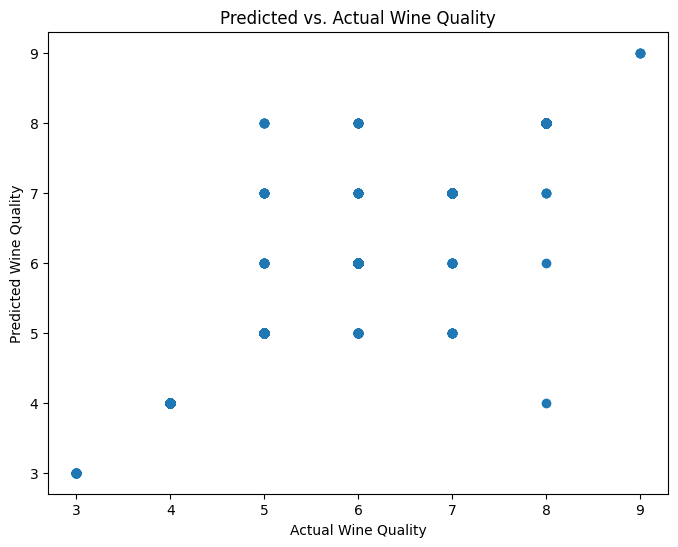

In [ ]:
# Visualize predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('Predicted vs. Actual Wine Quality')
plt.show()
